# <center> **UBC Simulation** </center>
---

The goal of this project is to investigate the properties of a specific type of synapses in the cerebellum: the synapse between **mossy fibers (MF)** and **unipolar brush cells (UBCs)**.

These synapses are interesting because they feature gigantic dimensions, with numerous neurotransmitter release sites.
They could potentially play a role in the signal transmission in the cerebellum, acting like filters. They could be involved in the temporal integration of the signal, from the sensory detection of acceleration, to the cognitive perception of movement. 

The aim of this modeling is to assess the effects of the **morphology** of a synapse on the **signal transmission**.

 ---
 
All the modules and functions provided in the project are documented, and accessible through help().

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import UBC_synapse
from UBC_synapse import synapse as synapse
from UBC_synapse import patterns_release as patterns_release
from UBC_synapse import visualize as visualize
from UBC_synapse import create_matrix as create_matrix

help(UBC_synapse)

UBC_synapse importation:
synapse successfully imported
patterns_release successfully imported
visualize successfully imported
simulate successfully imported
Creating a file 'register_syn.csv'.
Help on package UBC_synapse:

NAME
    UBC_synapse - Modeling of synapses between mossy fibers and unipolar brush cells (UBCs) in the cerebellum.

DESCRIPTION
    The goal of this module is to investigate the properties of a specific type of synapses in the cerebellum: between mossy fibers and unipolar brush cells (UBCs).
    These synapses are interesting because they feature gigantic dimensions, with numerous neurotransmitter (glutamate) release sites.
    They could potentially play a role in the signal transmission in the cerebellum, acting like filters. They could be involved in the temporal integration of the signal, from the sensory detection of acceleration, to the cognitive perception of movement. 
    
    The aim is to assess the effect of the diameter of the synapse on the signal tran

## I - Determination of parameters
---

The main parameter which is assumed to influence the signal transmission is the **diameter of the glomerule** (synaptic surface). Analysig its effects requires to test the behavior of synapses with different diameters, while keeping the other parameters fixed.
Thus, a first step consists in determining appropriate ranges of parameters. Namely, the following parameters have to be set:
- the range of the diameters which are to be tested: `dim_list`,
- the number of sites for neurotransmitter release: `n_sites`,
- the cumulative area of neurotranspitter realease: `area_tot_sites`.

A first criteria to chose values for those parameters is their matching as much as possible the physiological parameters. Some of them have been measured experimentally:
- diameters of the synapses: between 200 and 1000 µm,
- cumulative release area: 12 - 40 µm² (given by Mugni).

A second criteria for the parameters' values is thir convenience for dealing with modeling constraints. The synapse is modelled by a circular matrix. The release sites are homogenousely distributed on this area, according to a hexagonal grid. These properties impose some geometric relations between the spatial parameters.

### 1. Determination of `n_sites` and `dim_min`

Let us chose `area_tot_sites = 25e-12`, and try several values for `n_sites`.
The function called below automatically computes a corresponding `dim`, to match the geometric constraints of the hexagonal grid.

Different values for the number of sites lead to different shapes in the sites distributions, and to different shapes for an individual site.
From the results shown below, it seems acceptable to chose `n_sites = 37`.
In that case, the minimal dimension for the glomerule is `dim_min = 43`.

For bluiding a hexgrid, the closest possible value for n_sites is 37.
Release area updated with this parameter: 2.5159999999999997e-11 m^2.
Area of a single site: 3.3999999999999996e-06 m^2 (17 px).
Diameter obtained for the glomerulus: 8.599999999999999e-06 m = 85.99999999999999 um (43 px).
No synapse registered yet.


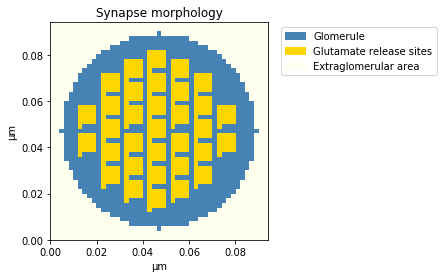

For bluiding a hexgrid, the closest possible value for n_sites is 55.
Release area updated with this parameter: 2.6399999999999997e-11 m^2.
Area of a single site: 2.4e-06 m^2 (12 px).
Diameter obtained for the glomerulus: 8.599999999999999e-06 m = 85.99999999999999 um (43 px).
No synapse registered yet.


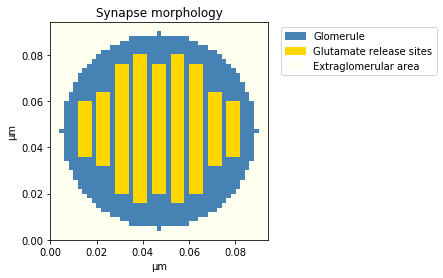

For bluiding a hexgrid, the closest possible value for n_sites is 61.
Release area updated with this parameter: 2.6839999999999995e-11 m^2.
Area of a single site: 2.2e-06 m^2 (11 px).
Diameter obtained for the glomerulus: 8.599999999999999e-06 m = 85.99999999999999 um (43 px).
No synapse registered yet.


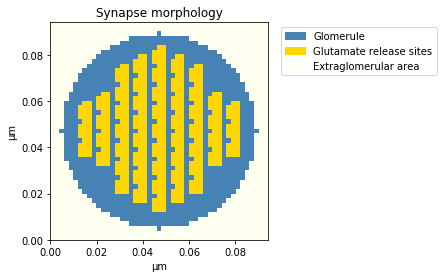

In [2]:
area_tot_sites = 25e-12
# Instanciation of synapses with different numbers of sites:
for n_sites in [35, 50, 60] :
    syn = synapse.Synapse(n_sites=n_sites, area_tot_sites=area_tot_sites, verbose=True)
    syn.visualize_self()

### 2. Determination of a range of dimensions to test 

Let us try the several values for `dim`, keeping `n_sites` fixed to `37`. 

The dimensions tested below, `[40, 80, 130]`, are adapted by the function in order to yield more convenient final dimensions.

From the results shown below, it seems that choosing `dim_list = [43, 79, 115]` enables to asses synapses with noticeable differences, which is the aim of the analysis.

Number of release sites: 37.
Release area updated with this parameter: 2.5159999999999997e-11 m^2.
Area of a single site: 3.3999999999999996e-06 m^2 (17 px).
Diameter obtained for the glomerulus: 8.599999999999999e-06 m = 85.99999999999999 um (43 px).
No synapse registered yet.


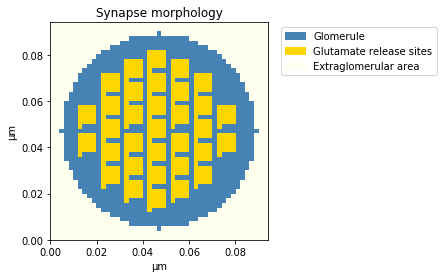

Number of release sites: 37.
Release area updated with this parameter: 2.5159999999999997e-11 m^2.
Area of a single site: 3.3999999999999996e-06 m^2 (17 px).
Diameter obtained for the glomerulus: 1.5799999999999998e-05 m = 157.99999999999997 um (79 px).
No synapse registered yet.


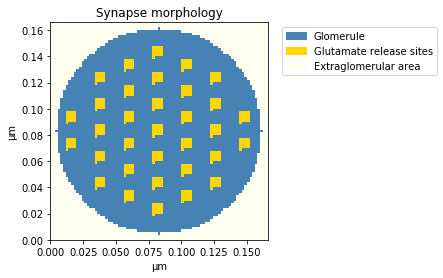

Number of release sites: 37.
Release area updated with this parameter: 2.5159999999999997e-11 m^2.
Area of a single site: 3.3999999999999996e-06 m^2 (17 px).
Diameter obtained for the glomerulus: 2.3e-05 m = 230.0 um (115 px).
No synapse registered yet.


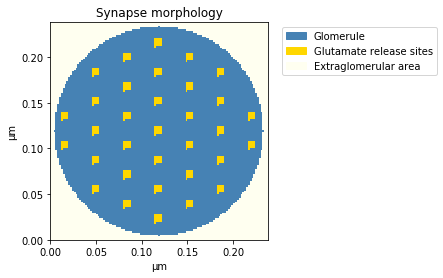

Final dimensions: [43, 79, 115]


In [3]:
n_sites = 37
dim_list = [40, 80, 130]

# Diameters that will be optimized by the function:
final_dims = []

# Instanciation of synapses with testing different diameters:
for dim in dim_list :
    syn = synapse.Synapse(n_sites=n_sites, dim=dim, area_tot_sites=area_tot_sites, verbose=True)
    final_dims.append(syn.dim)
    syn.visualize_self()

print("Final dimensions: {}".format(final_dims))

## II. Generation of stimulation patterns
---

Now that several synapses have been selected, the next step is to investigate their behavior. For this purpose, they can be submitted to different **stimulation patterns**. 

A stimulation pattern is a sequence of spikes of the presynaptic neuron (mossy fiber). It describes, in time, the events of glutamate release. Different types of patterns can be tested.

### 1. "Experimental stimulation" patterns

Those patterns consist in one or several spike events, at a fixed frequency. 

This type of patterns is meant to validate the model, by comparing the shape of the computed responses to real neurons' responses recorded on under artifical stimulation.

In [4]:
patt = patterns_release.Pattern(mode='stim', n_stim=5, dur=0.5, f_stim=150)
patt.visualize_patt()

patt = patterns_release.Pattern(mode='stim', n_stim=10, dur=0.5, f_stim=80)
patt.visualize_patt()

### 2. "Oscillatory" patterns

Those patterns consist in continuous firing, whose frequency follows a sinusoidal variation. 

This type of pattern is closer to the in vivo firings of the pre-synaptic neurons. It is the overall variation of firing frequency which constitutes the "signal".

In [5]:
patt = patterns_release.Pattern(mode='oscill', fenv=10)
patt.visualize_patt()
patt = patterns_release.Pattern(mode='oscill', fenv=5)
patt.visualize_patt()
patt = patterns_release.Pattern(mode='oscill', fenv=1)
patt.visualize_patt()

## III. Running the simulations
---

Henceforth, let us take a look at the synapse behavior under a stimulation pattern. A response features several components:
1. The evolution of the **neurotransmitter (glutamate) concentrations** in the synapse. Its variations can be recorder at different locations on the synapse, as it is likely to be inhomogeneous between release sites and non-release areas. Its evolution is determined by diffusion equations (Fick's laws).
2. The activation state of the post-synaptic **AMPA receptor**. The AMPA receptor is a ionic channel, whose opening triggers the membrane depolarization. The receptor can be in several states: open, closed, or desensitised. The probability of being in a state depends on the local concentration of glutamate. The activation of the AMPA receptor is measured by computing, at each time, the proportion of AMPA receptors in the open state (among the whole population of receptors in the synapse).
3. The variations of the post-synaptic (UBC) **membrane potential**. The depolarization of the neuron depends on the total current intering through the AMPA receptors. The variations of the membrane potential represents the signal transmitted in the post-synaptic neuron.

### 1. Stimulating a synapse with a pattern

Below is provided an example of procedure for using the package, in several steps.

1. Instanciation of a dictionary of synapses, of dimensions `[43, 79, 115]`.
2. Generation of a simple experimental pattern.
3. Running a simulation with this pattern on the smaller synapse.
4. Saving the results for future analyses.

At the end of this process, the folder `UCB_data/` should have been created, and contain a file `register_syn.csv`. A line describing `syn['43']` should appear inside this file, indexed by `1`. 
A sub-folder named `syn1/` should also have been generated, containing a file `register_resp1.csv` and a folder `patt1/`. The first line in `register_resp1.csv` described the pattern used for the simulation, whereas the folder `patt1/` contains the data which has just been computed.

No synapse registered yet.
No synapse registered yet.
No synapse registered yet.
Synapses instanciated: dict_keys(['43', '79', '103'])


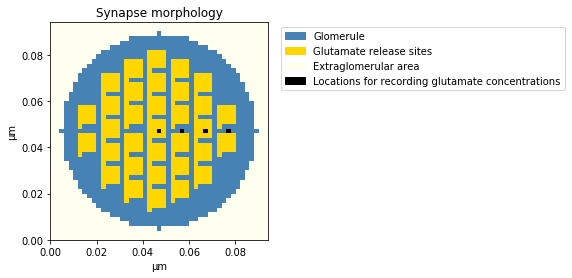

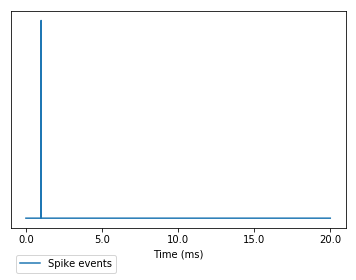

In [6]:
n_sites = 37
dim_list = [43, 79, 115]

# 1. Dictionary of synapses objects:
syn = synapse.Synapse.instantiate(dim_list=dim_list, n_sites=n_sites) 
syn['43'].visualize_self(print_coords=True)

# 2. Pattern:
patt = patterns_release.Pattern(mode='stim')
patt.visualize_patt()

In [7]:
# 3. Simulation
syn['43'].simulate_stimulation(patt)

1. Checking if a response is currently loaded in the attribute resp.
resp is empty. Proceeding.
2. Checking if a response has already been computed for this pattern.
No synapse registered yet.
No response registered yet.
3. Running the simulation. It may take some time.
Simulation completed.


In [8]:
# 4. Saving
syn['43'].save_response()

No synapse registered yet.
1. Finding the location of the data of this synapse.
No synapse registered yet.
New synapse registration. Index: 1
Synapse already registered under index: 1
Creating a directory for the synapse of synindex 1.
Synapse already registered under index: 1
Retrieving the register of saved responses for this synapse.
Number of responses registered: 0
Synapse already registered under index: 1
Retrieving the register of saved responses for this synapse.
Number of responses registered: 0
2. Attributing an index to the response.
First response, index = 1.
3. Creating a directory for this response and saving the response.
Saved.


This procedure can be reproduced for `syn['79']`, leading to appending a new line in `register_syn.csv` and creating a new sub-foder`syn2`.

In [9]:
syn['79'].simulate_stimulation(patt)
syn['79'].save_response()

1. Checking if a response is currently loaded in the attribute resp.
resp is empty. Proceeding.
2. Checking if a response has already been computed for this pattern.
No response registered yet.
3. Running the simulation. It may take some time.
Simulation completed.
1. Finding the location of the data of this synapse.
New synapse registration. Index: 2
Synapse already registered under index: 2
Creating a directory for the synapse of synindex 2.
Synapse already registered under index: 2
Retrieving the register of saved responses for this synapse.
Number of responses registered: 0
Synapse already registered under index: 2
Retrieving the register of saved responses for this synapse.
Number of responses registered: 0
2. Attributing an index to the response.
First response, index = 1.
3. Creating a directory for this response and saving the response.
Saved.


For further analysis with multiple syapses, it could be useful to retrieve a previousely saved synapse.
The register can be filtered according to specific criteria, such as the diameter of interest.
Then, a response can be looked for in the synapse register of responses.

In [10]:
syn_found = synapse.Synapse.search_synapses(verbose=True, dim=43)
syn_back = synapse.Synapse.retrieve_synapse(syn_found[0])
print(syn_back)

syn_back.remember_responses()
print(syn_back.register_resp)

resp_found = syn_back.search_responses(verbose=True, n_stim=1)
print(resp_found)

Indexes of found synapses: [1].
Retrieving the synapse of index 1.
/media/esther/Données/Travail/Stages/PCBS_UBC_synapse/UBC_data/syn1.pickle
Successfully retrieved.
Synapse already registered under index: 1
Retrieving the register of saved responses for this synapse.
Number of responses registered: 1
     dur  f_stim  fenv  fmax  fmin  mode  n_stim    nit  start         tstep
1  0.002     100   NaN   NaN   NaN  stim       1  20000   1000  1.000000e-07
[1]


### 2. Visualizing the results

Below are displayed the time series for AMPA activation and membrane potential on the smallest synapse.
The results are not totally consistent, and those for the glutamate were not recorded correctly. 
A further investigationof this issue would be necessary.

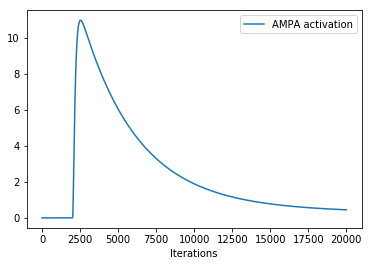

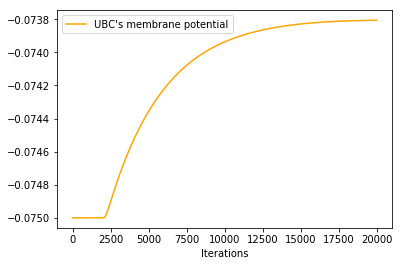

In [14]:
plt.plot(syn['43'].resp['AMPAtot'], label="AMPA activation")
plt.xlabel("Iterations")
plt.legend()
plt.show()
plt.plot(syn['43'].resp['V'], label="UBC's membrane potential", color='orange')
plt.xlabel("Iterations")
plt.legend()
plt.show()